## Magnetization of a Superconductor

[0.0552648  0.05526484 0.05526507 0.05525178 0.05524982 0.05524874
 0.05525996 0.05523657 0.05523344 0.05523224]
[0.45408067 0.45410696 0.4540736  0.45408389 0.45408585 0.4540935
 0.45412427 0.45411246 0.45410012 0.45408662]
[-0.03224817 -0.03226772 -0.03227147 -0.0322471  -0.03223735 -0.03226436
 -0.03225936 -0.03226423 -0.03226249 -0.03225251]
[-0.14224223 -0.14226513 -0.14227792 -0.14231311 -0.14229228 -0.14226155
 -0.14228043 -0.14226679 -0.14230082 -0.14230135]
[0.16203809 0.16202522 0.16201319 0.16202615 0.16200643 0.16201225
 0.16200276 0.16203183 0.16202285 0.16202107]
[0.12468336 0.12470075 0.12467433 0.12464361 0.12469321 0.12472674
 0.12470662 0.12470555 0.12470318 0.12473595]
[-0.11425636 -0.11436145 -0.11454722 -0.11464475 -0.11486714 -0.11497576
 -0.11528921 -0.11535928 -0.11545471 -0.11570429]


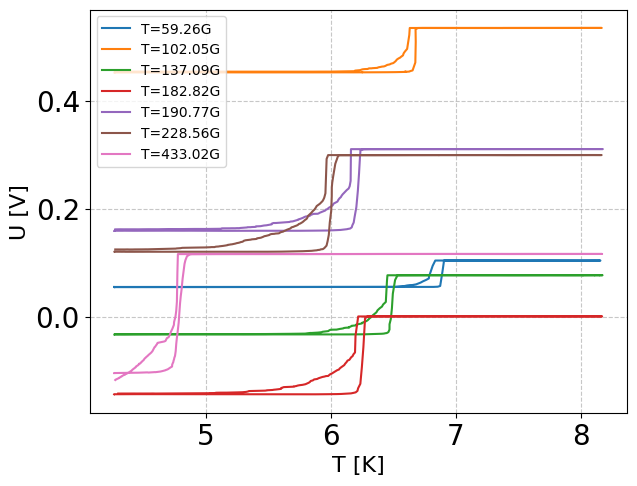

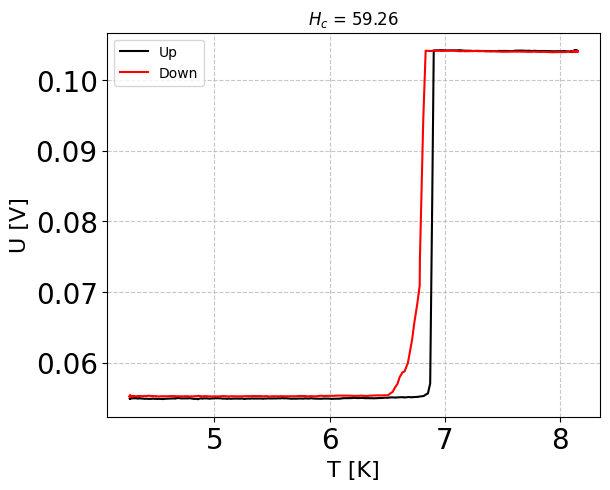

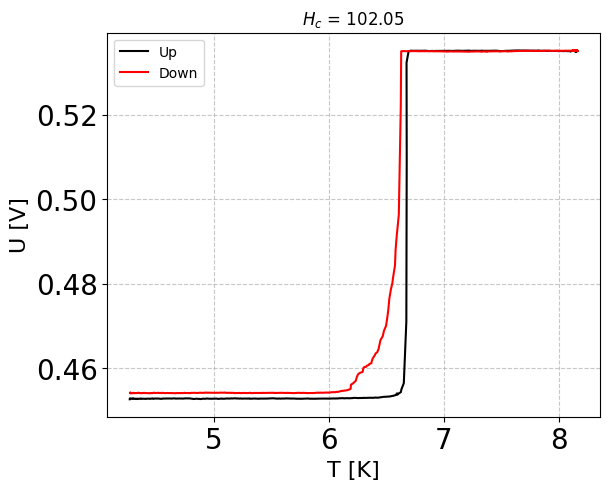

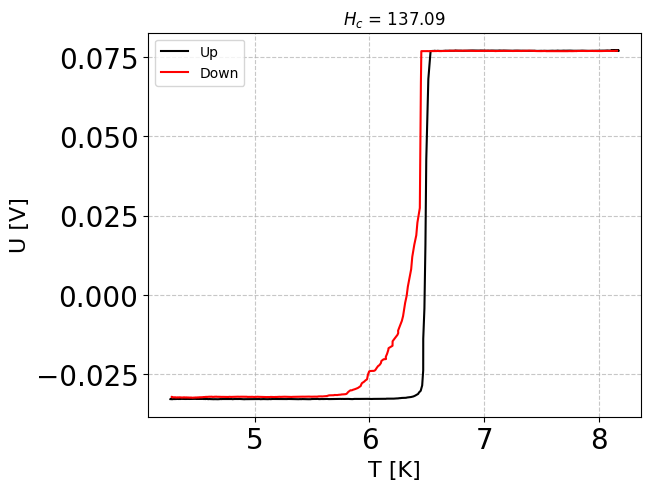

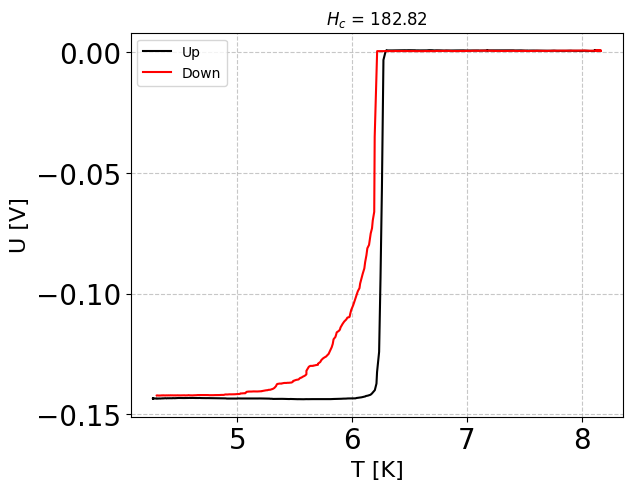

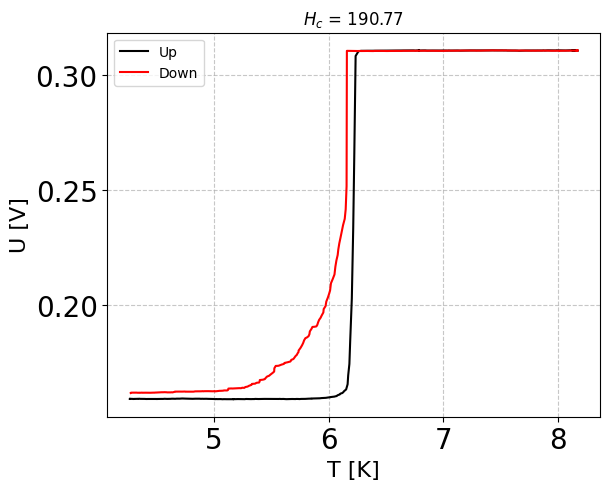

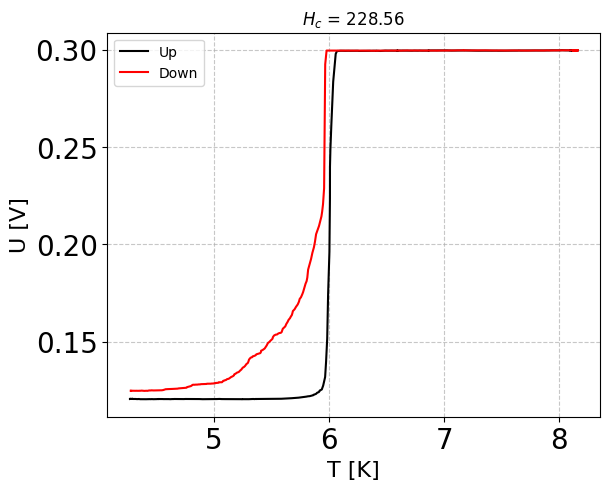

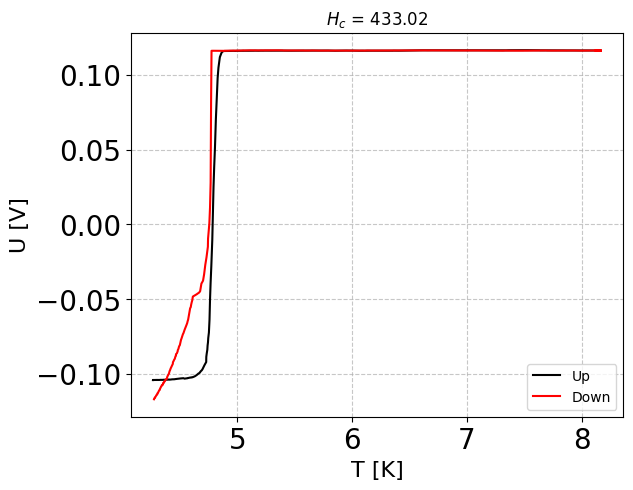

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate

# fd means field dependent
# td means temperature dependent
input_path_fd = '/Users/ssajal/Desktop/academic/practical_M.1/megnatization_of_superconductor/data_copy/Field_dependent/'
input_path_td = '/Users/ssajal/Desktop/academic/practical_M.1/megnatization_of_superconductor/data_copy/Temperature_dependent/'
output_path = '/Users/ssajal/Desktop/academic/practical_M.1/megnatization_of_superconductor/code/outputs/'
output_path_01 = '/Users/ssajal/Desktop/academic/practical_M.1/megnatization_of_superconductor/code/outputs/temperature_dependent/'
output_path_02 = "/Users/ssajal/Desktop/academic/practical_M.1/megnatization_of_superconductor/code/outputs/field_dependent"

file_names = np.array(["01","02","03","05","04","06","08","09","10","11"])


def f_straightline(x, m, c):
    return m * x + c

def f_sharp_drop_point(H, residual):
    for i in range(0,len(H[np.argmax(residual):])):
        difference = residual[np.argmax(residual)+i] - residual[np.argmax(residual)+i+10]
        if np.abs(difference) < .001:
            return i+10

def f_H_T_calculation(R_Sample, I_Coil, U_Magnetometer,i):
    # H = k*I_Coil; magnetic field strength
    H = np.average(I_Coil) * 739
    # temperature calculation
    T = 1.017 + 6.07 * np.exp(-R_Sample/1700) + 40.6 * np.exp(-R_Sample/170)
    return H, T, U_Magnetometer


def all_curve_seperatred(T, U_Magnetometer, H, key, color, i):
    #print(i)
    #fig, ax0 = plt.subplots()
    ax0.plot(T, U_Magnetometer, color = color, label = key)
    ax0.set_xlabel("T [K]",size=16)
    ax0.set_ylabel("U [V]",size=16)
    ax0.tick_params(axis='x', labelsize=20)
    ax0.tick_params(axis='y', labelsize=20)
    ax0.grid(True, linestyle='--', alpha=0.7)
    ax0.set_position([0.2, .14, 0.77, 0.80]) #left,bottom,right,top
    #ax0.savefig(output_path+f"temperature_dependent/T_vs_U/{i}.jpg")
    #ax0.show()

def all_curve_in_one(T, U_Magnetometer,H, i):
    ax5.plot(T, U_Magnetometer, label = f"T={H:.2f}G")
    ax5.set_xlabel("T [K]",size=16)
    ax5.set_ylabel("U [V]",size=16)
    ax5.tick_params(axis='x', labelsize=20)
    ax5.tick_params(axis='y', labelsize=20)
    ax5.grid(True, linestyle='--', alpha=0.7)
    ax5.set_position([0.14, .14, 0.84, 0.84]) #left,bottom,right,top
    ax5.set_title("")



del_U_up_all = []
del_U_down_all = []
frac_M_max_up_and_down_all = []
H_all = []

fig, ax5 = plt.subplots() # all in one

#fig, ax1 = plt.subplots()
for i in range(0,7):
    #print(i)
    fig, ax0 = plt.subplots()
    R_Sample, I_Coil, U_Magnetometer = np.loadtxt(input_path_td + file_names[i], unpack = True)
    #print(U_Magnetometer)
 
    # calculate H, T from raw data files
    H, T, U_Magnetometer = f_H_T_calculation(R_Sample, I_Coil, U_Magnetometer,i)
    end_point = np.argmax(T)
    H_all.append(H)
    #print(end_point)
    #print((H))
    #H_up = H[:end_point]

    # seperate warm_up and cool_down curves
    T_up, U_Magnetometer_up = T[:end_point], U_Magnetometer[:end_point]
    T_down, U_Magnetometer_down = T[end_point+1:], U_Magnetometer[end_point+1:]

    del_U_up = np.max(U_Magnetometer_up) - np.min(U_Magnetometer_up)
    del_U_up_all.append(del_U_up)
    del_U_down = np.max(U_Magnetometer_down) - np.min(U_Magnetometer_down)
    del_U_down_all.append(del_U_down)
    print(U_Magnetometer_down[-30:-20])
    if i == 2 or i == 3: # because these values are in negative side of the curve
        frac_M_max_up_and_down = (np.min(U_Magnetometer_down) / np.min(U_Magnetometer_up)) * 100
        #print("up",np.max(U_Magnetometer_up),"down",np.max(U_Magnetometer_down))
        frac_M_max_up_and_down_all.append(frac_M_max_up_and_down)
    else:
        frac_M_max_up_and_down = (np.min(U_Magnetometer_up) / np.min(U_Magnetometer_down)) * 100
        #print("up",np.max(U_Magnetometer_up),"down",np.max(U_Magnetometer_down))
        frac_M_max_up_and_down_all.append(frac_M_max_up_and_down)        
    #frac_M_max_up_and_down = (np.min(U_Magnetometer_up) / np.min(U_Magnetometer_down)) * 100
    #print("up",np.max(U_Magnetometer_up),"down",np.max(U_Magnetometer_down))
    #frac_M_max_up_and_down_all.append(frac_M_max_up_and_down)

    key_1, color_1 = "Up", "black"
    key_2, color_2 = "Down", "red"

    dummy_0 = all_curve_seperatred(T_up, U_Magnetometer_up, H, key_1, color_1, i) # for up
    dummy_1 = all_curve_seperatred(T_down, U_Magnetometer_down, H, key_2, color_2, i) # for up
    # all in one curve
    dummy_2 = all_curve_in_one(T, U_Magnetometer,H, i)
    ax0.set_title(f"$H_c$ = {H:.2f}")
    ax0.legend()
    ax0.figure.savefig(output_path+f"temperature_dependent/T_vs_U/{i}.jpg")
    #ax0.show()

ax5.legend(loc='upper left',fontsize=10)
ax5.figure.savefig(output_path+f"temperature_dependent/T_vs_U/all_in_one.jpg")



done


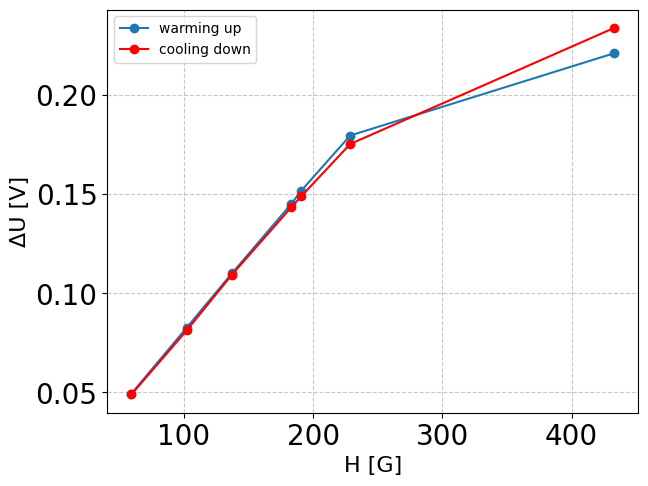

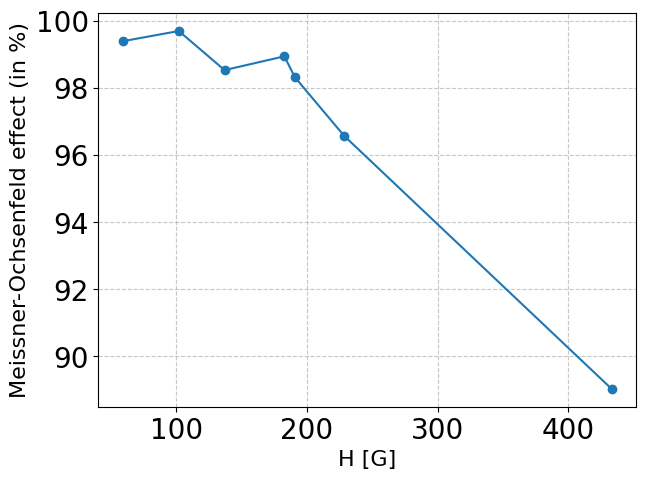

In [2]:

#print(H_all)
#print(del_U_up_all)
fig, ax1 = plt.subplots()
ax1.plot(H_all,del_U_up_all,marker="o", label="warming up")
ax1.plot(H_all,del_U_down_all,marker="o", color="red", label="cooling down")
ax1.set_xlabel("H [G]",size=16)
ax1.set_ylabel("ΔU [V]",size=16)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_position([0.16, .14, 0.83, 0.84]) #left,bottom,right,top
ax1.legend()
ax1.figure.savefig(output_path+"temperature_dependent/T_vs_U/flux_change.jpg")

#print("asdas", frac_M_max_up_and_down_all)
fig, ax2 = plt.subplots()
ax2.plot(H_all,frac_M_max_up_and_down_all,marker="o")
ax2.set_xlabel("H [G]",size=16)
ax2.set_ylabel("Meissner-Ochsenfeld effect (in %)",size=16)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.grid(True, linestyle='--', alpha=0.7)
#ax2.set_ylim(80,100)
ax2.set_position([0.15, .14, 0.84, 0.82]) #left,bottom,right,top
#ax2.legend()
ax2.figure.savefig(output_path+"temperature_dependent/T_vs_U/M_max_up_frac_M_max_down.jpg")



print("done")